<a href="https://colab.research.google.com/github/mamatqobulovsardor/Pythonda_oddiy_chiziqli_regressiya_modelini_qurish/blob/main/Pythonda_oddiy_chiziqli_regressiya_modelini_qurish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pythonda oddiy chiziqli regressiya modelini qanday qurish mumkin

In [2]:
import pandas as pd

In [3]:
delaney_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv'
df = pd.read_csv(delaney_url)
df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [4]:
descriptors_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
descriptors = pd.read_csv(descriptors_url)
descriptors

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [5]:
x = descriptors.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [7]:
y = descriptors.logS
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


Ma'lumotlarni ajratish

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Chiziqli regressiya modeli

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

x_train ni bashorat qilish

In [13]:
y_pred_train = model.predict(x_train)

In [14]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_train, y_pred_train))

Coefficients: [-0.71457654 -0.00671856  0.00318457 -0.42814467]
Intercept: 0.2149443345092661
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


x_test ni bashorat qilish

In [15]:
y_pred_test = model.predict(x_test)

In [16]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred_test))

Coefficients: [-0.71457654 -0.00671856  0.00318457 -0.42814467]
Intercept: 0.2149443345092661
Mean squared error (MSE): 1.03
Coefficient of determination (R^2): 0.78


Bizning chiziqli regressiya tenglamamiz

In [18]:
print('LogS = %.2f %.2f LogP %.4f MW + %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3] ) )


LogS = 0.21 -0.71 LogP -0.0067 MW + 0.0032 RB -0.43 AP


In [21]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]

In [22]:
print('LogS = '+
      ' ' +
      yintercept +
      ' ' +
      LogP +
      ' ' +
      MW +
      ' + ' +
      RB +
      ' ' +
      AP)


LogS =  0.21 -0.71 LogP -0.0067 MW + 0.0032 RB -0.43 AP


Modelni o'qitish uchun butun ma'lumotlar to'plamidan foydalaning (taqqoslash uchun)

In [23]:
full = linear_model.LinearRegression()
full.fit(x, y)

LinearRegression()

In [24]:
full_pred = model.predict(x)

In [25]:
print('Coefficients:', full.coef_)
print('Intercept:', full.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y, full_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y, full_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.2565006830997185
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [26]:
full_yintercept = '%.2f' % full.intercept_
full_LogP = '%.2f LogP' % full.coef_[0]
full_MW = '%.4f MW' % full.coef_[1]
full_RB = '%.4f RB' % full.coef_[2]
full_AP = '%.2f AP' % full.coef_[3]

In [27]:
print('LogS = '+
      ' ' +
      full_yintercept +
      ' ' +
      full_LogP +
      ' ' +
      full_MW +
      ' + ' +
      full_RB +
      ' ' +
      full_AP)


LogS =  0.26 -0.74 LogP -0.0066 MW + 0.0032 RB -0.42 AP


Eksperimental va bashorat qilingan LogS ning tarqalish sxemasi

Train va Test to'plamlarining o'zgaruvchan o'lchamlarini tezkor tekshirish

In [28]:
y_train.shape, y_pred_train.shape

((915,), (915,))

In [29]:
y_test.shape, y_pred_test.shape

((229,), (229,))

Vertical plot

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

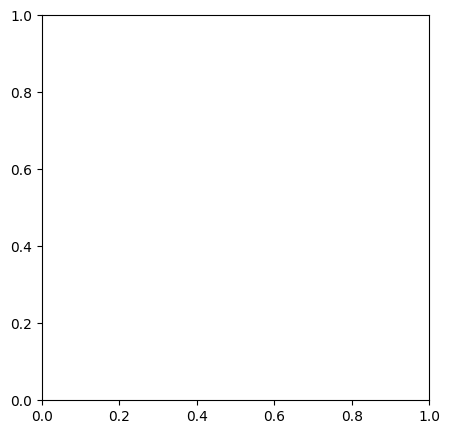

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,11))

plt.subplot(2, 1, 1)
plt.scatter(X=y_train, Y=y_pred_train, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train, y_pred_train, 1)
p = np.ploy1d(z)
plt.plot(y_test,p(y_test),'#F8766D')

plt.ylabel('Predicted LogS')

plt.subplot(2, 1, 2)
plt.scatter(X=y_test, X=y_pred_test, c='#619CFF', alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(y_test),'#F8766D')

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()

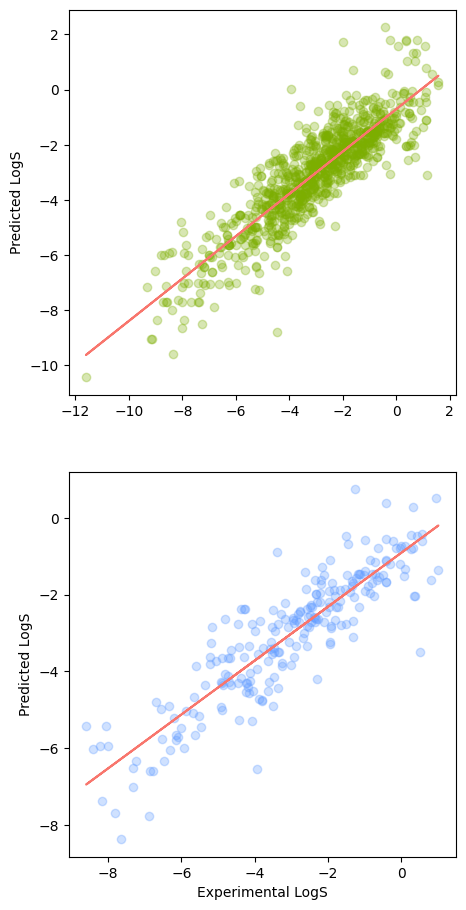

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 11))

plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted LogS')

plt.subplot(2, 1, 2)
plt.scatter(x=y_test, y=y_pred_test, c='#619CFF', alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), '#F8766D')

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()

Horizontal plot

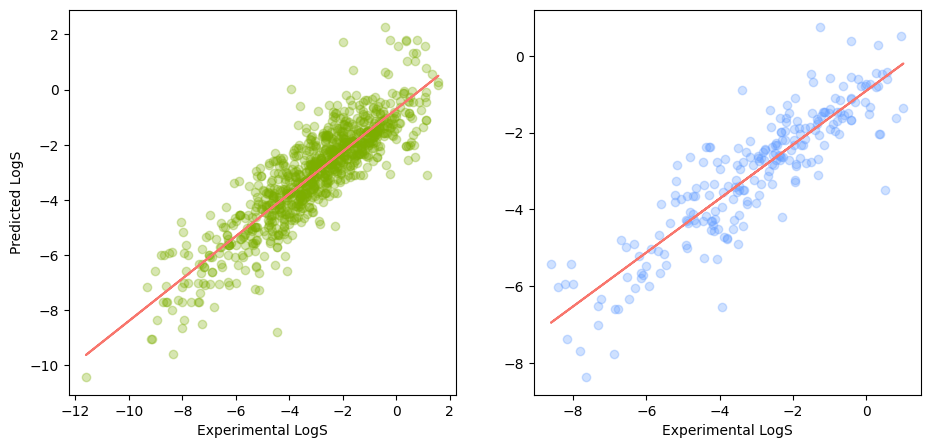

In [32]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=y_pred_train, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#F8766D')

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=y_pred_test, c='#619CFF', alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), '#F8766D')

plt.xlabel('Experimental LogS')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()